# Assignment 4
 By Jaspreet Kaur Saini
 Student #:8876747 

In [1]:
# pip install pulp

# Question 1

In [11]:
#Question 1.1 and 1.2
import pulp

# Minimize cost function 
prob_lin = pulp.LpProblem("Minimize_Cost", pulp.LpMinimize)

# Variables to be used
lisa_hrs  = pulp.LpVariable('Hours_Lisa', lowBound=0) 
david_hrs = pulp.LpVariable('Hours_David', lowBound=0)
sarah_hrs = pulp.LpVariable('Hours_Sarah', lowBound=0)

# Total project hours
total_hrs = 150

# Add the objective function
prob_lin += 30 * lisa_hrs + 25 * david_hrs + 18 * sarah_hrs, "Total Cost"

# Add constraints
prob_lin += lisa_hrs + david_hrs + sarah_hrs == total_hrs, "Total Project Hours"
prob_lin += lisa_hrs >= 0.4 * (lisa_hrs + david_hrs), "Lisa's Min Hours"
prob_lin += lisa_hrs <= 50 , "Lisa's Max Hours"
prob_lin += sarah_hrs >= 0.15 * total_hrs, "Sarah's Min Hours"
prob_lin += sarah_hrs <= 0.25 * (lisa_hrs + david_hrs), "Sarah's Max Hours"


# Solve the problem
prob_lin.solve()

# Printing the optimisation results
print("Status of the optimization problem:", pulp.LpStatus[prob_lin.status])
print("Number of hours allocated to Senior Designer-Lisa:", pulp.value(lisa_hrs))
print("Number of hours allocated to Senior Designer-David:", pulp.value(david_hrs))
print("Number of hours allocated to Junior Designer-Sarah:", pulp.value(sarah_hrs))
print("Total Cost:", pulp.value(prob_lin.objective))


Status of the optimization problem: Optimal
Number of hours allocated to Senior Designer-Lisa: 48.0
Number of hours allocated to Senior Designer-David: 72.0
Number of hours allocated to Junior Designer-Sarah: 30.0
Total Cost: 3780.0


In [10]:
# Question 1.3. Lisa can work more than 50 hours. 
import pulp

# Minimize cost function 
prob_lin = pulp.LpProblem("Minimize_Cost", pulp.LpMinimize)

# Variables to be used
lisa_hrs  = pulp.LpVariable('Hours_Lisa', lowBound=0)  
david_hrs = pulp.LpVariable('Hours_David', lowBound=0)
sarah_hrs = pulp.LpVariable('Hours_Sarah', lowBound=0)

# Total project hours
total_hrs = 150

# Add the objective function
prob_lin += 30 * lisa_hrs + 25 * david_hrs + 18 * sarah_hrs, "Total Cost"

# Add constraints
prob_lin += lisa_hrs + david_hrs + sarah_hrs == total_hrs, "Total Project Hours"
prob_lin += lisa_hrs >= 0.4 * (lisa_hrs + david_hrs), "Lisa's Min Hours"
# prob_lin += lisa_hrs <= 50 , "Lisa's Max Hours >= 50" # contraint change since Lisa can work more than 50 hours. 
prob_lin += sarah_hrs >= 0.15 * total_hrs, "Sarah's Min Hours"
prob_lin += sarah_hrs <= 0.25 * (lisa_hrs + david_hrs), "Sarah's Max Hours"


# Solve the problem
prob_lin.solve()

# Printing the optimisation results
print("Status of the optimization problem:", pulp.LpStatus[prob_lin.status])
print("Number of hours allocated to Senior Designer-Lisa:", pulp.value(lisa_hrs))
print("Number of hours allocated to Senior Designer-David:", pulp.value(david_hrs))
print("Number of hours allocated to Junior Designer-Sarah:", pulp.value(sarah_hrs))
print("Total Cost:", pulp.value(prob_lin.objective))



Status of the optimization problem: Optimal
Number of hours allocated to Senior Designer-Lisa: 48.0
Number of hours allocated to Senior Designer-David: 72.0
Number of hours allocated to Junior Designer-Sarah: 30.0
Total Cost: 3780.0


In [8]:
# question 1.4 Sarah not required to work a min no. of hours
import pulp

# Minimize cost function 
prob_lin = pulp.LpProblem("Minimize_Cost", pulp.LpMinimize)

# Variables to be used
lisa_hrs  = pulp.LpVariable('Hours_Lisa', lowBound=0) 
david_hrs = pulp.LpVariable('Hours_David', lowBound=0)
sarah_hrs = pulp.LpVariable('Hours_Sarah', lowBound=0)

# Total project hours
total_hrs = 150

# Add the objective function
prob_lin += 30 * lisa_hrs + 25 * david_hrs + 18 * sarah_hrs, "Total Cost"

# Add constraints
prob_lin += lisa_hrs + david_hrs + sarah_hrs == total_hrs, "Total Project Hours"
prob_lin += lisa_hrs >= 0.4 * (lisa_hrs + david_hrs), "Lisa's Min Hours"
prob_lin += lisa_hrs <= 50 , "Lisa's Max Hours"
# prob_lin += sarah_hrs >= 0.15 * total_hrs, "Sarah's Min Hours"
prob_lin += sarah_hrs <= 0.25 * (lisa_hrs + david_hrs), "Sarah's Max Hours"
prob_lin += david_hrs >= 0.6 * (lisa_hrs + david_hrs)

# Solve the problem
prob_lin.solve()

# Printing the optimisation results
print("Status of the optimization problem:", pulp.LpStatus[prob_lin.status])
print("Number of hours allocated to Senior Designer-Lisa:", pulp.value(lisa_hrs))
print("Number of hours allocated to Senior Designer-David:", pulp.value(david_hrs))
print("Number of hours allocated to Junior Designer-Sarah:", pulp.value(sarah_hrs))
print("Total Cost:", pulp.value(prob_lin.objective))


Status of the optimization problem: Optimal
Number of hours allocated to Senior Designer-Lisa: 48.0
Number of hours allocated to Senior Designer-David: 72.0
Number of hours allocated to Junior Designer-Sarah: 30.0
Total Cost: 3780.0


# Question 2

In [9]:
from scipy.optimize import minimize

# cost fn for the plants- Dayton & Hamilton
def Dayton_cost_fn(x):
    return x**2 - x + 5

def Hamilton_cost_fn(y):
    return y**2 - 2*y + 3

# Defining the total cost fn
def total_cost_fn(var):
    x, y = var
    return Dayton_cost_fn(x) + Hamilton_cost_fn(y)

# constraint that the total production must be 8 (thousands of units)
prod_constraints = ({'type': 'eq', 'fun': lambda var: sum(var) - 8})

# Defining bounds for x and y (0 to 8, since the total prodn is 8)
bounds1 = ((0, 8), (0, 8))

# Initializing x and y
ini_guess = [4, 4]

# optimization the problem
result_min = minimize(total_cost_fn, ini_guess, method='SLSQP', bounds=bounds1, constraints=prod_constraints)

# Extract the optimal production volumes
optimal_x, optimal_y = result_min.x

# results for optimal production volumes and the minimum cost
print(f"Optimal number of gloves at Dayton production plant is {int(optimal_x*1000)}")
print(f"Optimal number of gloves at Hamilton production plant is {int(optimal_y*1000)}")
print(f"Minimum total cost of production at 2 plants: $ {total_cost_fn(result_min.x)*1000}")


Optimal number of gloves at Dayton production plant is 3750
Optimal number of gloves at Hamilton production plant is 4249
Minimum total cost of production at 2 plants: $ 27875.0


# Question 3

In [6]:
import pandas as pd
import pulp

# Read data from Excel file
app_cor_df = pd.read_excel('applecore.xlsx')

# Budget
budget_for_advert = 10 # (in thousands)

web10_cost = app_cor_df.iloc[2, 1:].tolist()
cust_vis_df = app_cor_df.iloc[6:, 1:].values.tolist()
cust_vis_df = [[int(value) for value in row] for row in cust_vis_df]

# Create a binary optimization problem
prob_max_web = pulp.LpProblem("Max_CustRe", pulp.LpMaximize)

# Binary decision variables
x = [pulp.LpVariable(f"x{i}", cat='Binary') for i in range(len(web10_cost))]

# Objective function
prob_max_web += pulp.lpSum([cust_vis_df[j][i] * x[i] for j in range(len(cust_vis_df)) for i in range(len(web10_cost))])

# Budget constraint
prob_max_web += pulp.lpSum([web10_cost[i] * x[i] for i in range(len(web10_cost))]) <= budget_for_advert

# Solve the optimization problem
prob_max_web.solve()

# Checking if optimization solution is successful or not
if pulp.LpStatus[prob_max_web.status] == "Optimal":
    # Extract the optimal solution
    web_sol = [x[i].value() for i in range(len(web10_cost))]
    max_cust_reached = int(pulp.value(prob_max_web.objective))
    print("Optimal solution:")
    print("Websites selected for advert (1 indicates selected):", web_sol)
    print("Customers reached #:", max_cust_reached)
else:
    print("Unable to find optimal solution.")

Optimal solution:
Websites selected for advert (1 indicates selected): [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Customers reached #: 27


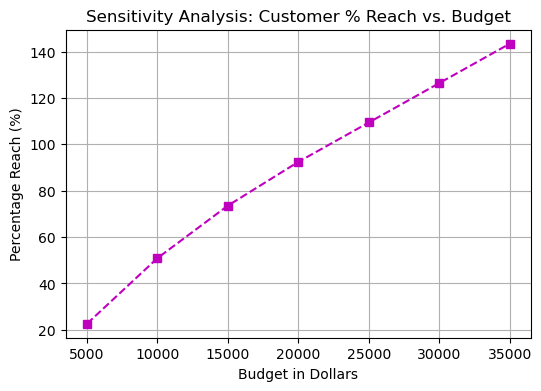

In [7]:
#sentivity analysis
import numpy as np
import matplotlib.pyplot as plt

# Initializing the lists to store budget and percentage reach ro sentisitivity analysis
budget_sen_val = np.arange(5, 40, 5)
percent_re = []

for a in budget_sen_val:
    # Creating a binary optimization problem
    prob_max_web = pulp.LpProblem("Max_CustRe", pulp.LpMaximize)

    # adding binary decision variables
    x = [pulp.LpVariable(f"x{i}", cat='Binary') for i in range(len(web10_cost))]

    # Objective function: maximize
    prob_max_web += pulp.lpSum([cust_vis_df[j][i] * x[i] for j in range(len(cust_vis_df)) for i in range(len(web10_cost))])

    # constraint for budget
    prob_max_web += pulp.lpSum([web10_cost[i] * x[i] for i in range(len(web10_cost))]) <= a

    # Solving the optimization problem to maximize customer reach
    prob_max_web.solve()

    # Calculate percentage of customers reached
    if pulp.LpStatus[prob_max_web.status] == "Optimal":
        max_cust_reached = int(pulp.value(prob_max_web.objective))
        a_percent_re = (max_cust_reached / len(cust_vis_df)) * 100
        percent_re.append(a_percent_re)
    else:
        percent_re.append(0)

# Plotting the line plot for checking the sensitivity analsysis
plt.figure(figsize=(6, 4))
plt.plot(budget_sen_val * 1000, percent_re, marker='s', linestyle='--',color='m')
plt.title('Sensitivity Analysis: Customer % Reach vs. Budget')
plt.xlabel('Budget in Dollars')
plt.ylabel('Percentage Reach (%)')
plt.grid(True)
plt.show()
